# Imports

In [1]:
# data
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import seaborn as sns
# model
from sklearn.ensemble import RandomForestClassifier
# evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

# Load Data

In [2]:
dataset = load_wine(as_frame=True)

In [3]:
X, y = dataset['data'], dataset['target']

In [4]:
X.shape, y.shape

((178, 13), (178,))

In [5]:
def train_validate_test_split(X, y, *args, **kwargs):  
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, *args, **kwargs)    
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, *args, **kwargs)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [6]:
X_train, X_val, X_test, y_train, y_val, y_test = train_validate_test_split(X, y, random_state=42)

In [7]:
print([item.shape for item in (X_train, X_val, X_test, y_train, y_val, y_test)])

[(99, 13), (34, 13), (45, 13), (99,), (34,), (45,)]


# Preview

In [8]:
print(dataset['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [9]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
91,12.00,1.51,2.42,22.0,86.0,1.45,1.25,0.50,1.63,3.60,1.05,2.65,450.0
32,13.68,1.83,2.36,17.2,104.0,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990.0
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
166,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695.0


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

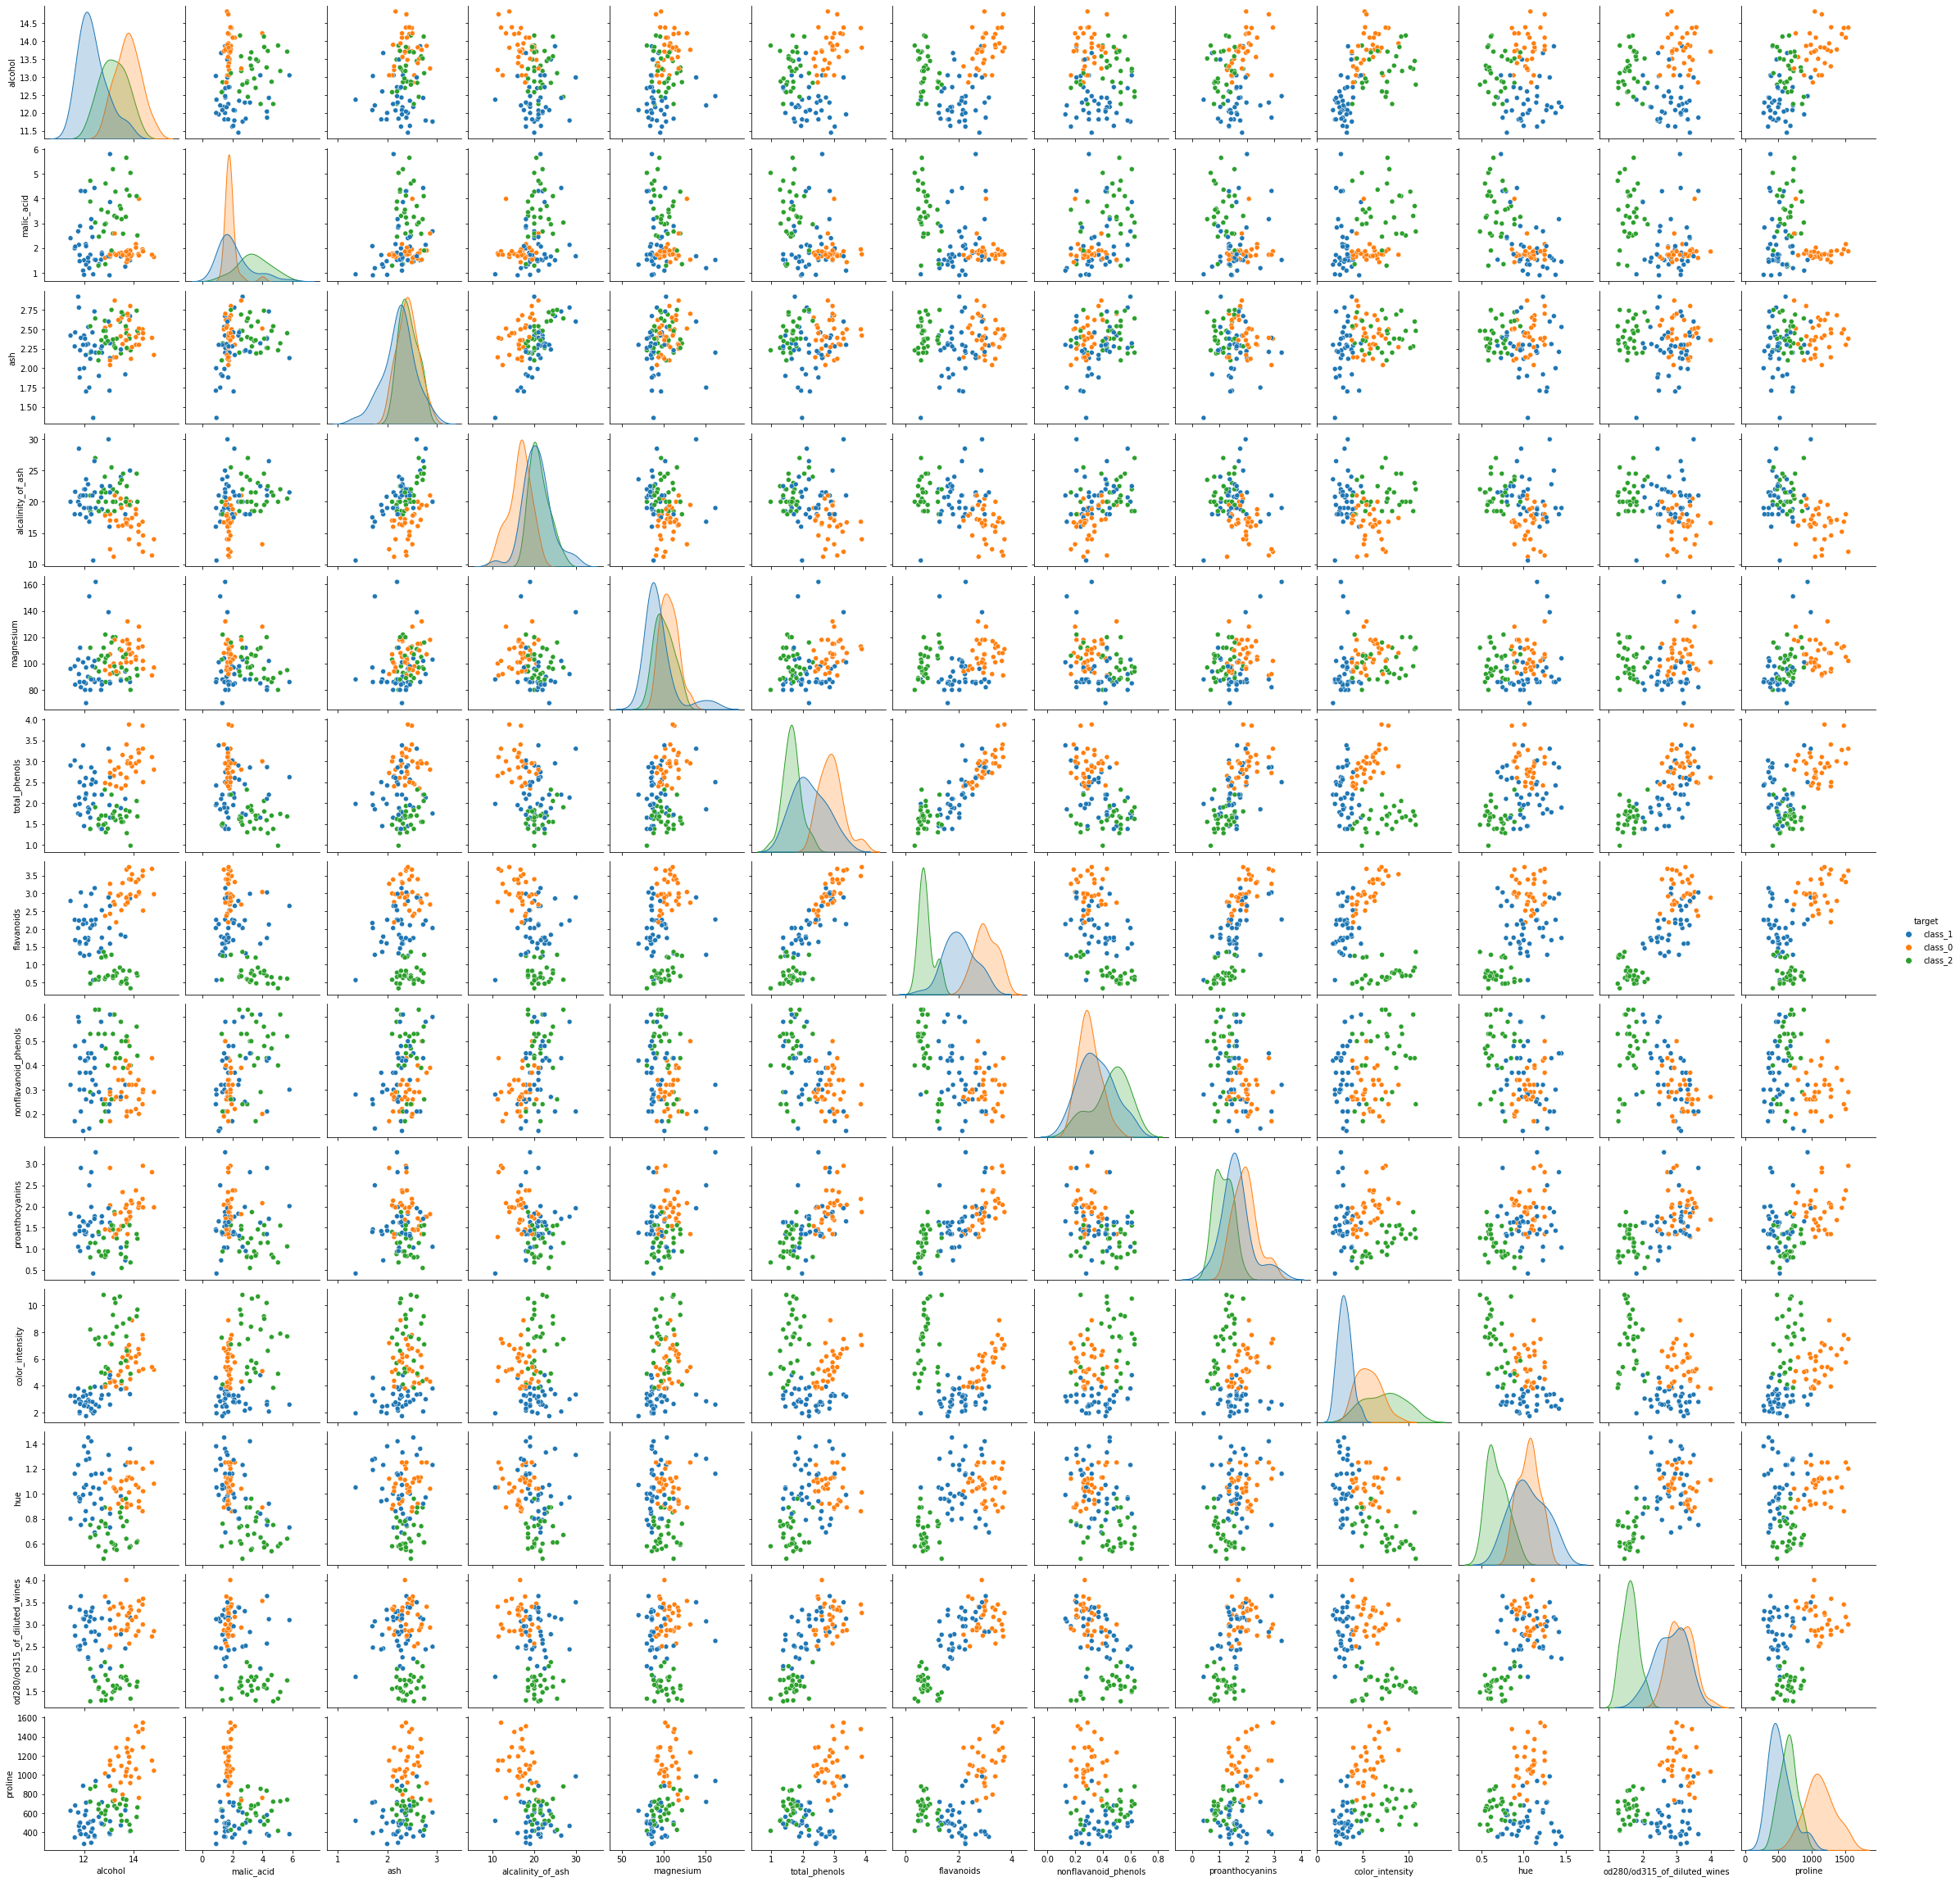

In [11]:
sns.pairplot(X_train.join(y_train.apply(lambda x: dataset['target_names'][x])), hue='target')

In [12]:
def show_missing_info(data):
    data = pd.DataFrame(data)
    return pd.DataFrame({
        'isnull': data.isnull().sum(),
        'nunique': data.nunique(),
        'dtypes': data.dtypes,
    })

In [13]:
show_missing_info(X_train)

,isnull,nunique,dtypes
alcohol,0,82,float64
malic_acid,0,82,float64
ash,0,63,float64
alcalinity_of_ash,0,50,float64
magnesium,0,42,float64
total_phenols,0,65,float64
flavanoids,0,78,float64
nonflavanoid_phenols,0,33,float64
proanthocyanins,0,64,float64
color_intensity,0,83,float64


# Model

In [14]:
model = RandomForestClassifier(n_estimators=100)

In [15]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
y_val_pred = model.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)

In [17]:
print(f'Validation Accuracy: {val_acc:.2%}')

Validation Accuracy: 94.12%


# Evaluation 

In [18]:
y_test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

In [19]:
print(f'Test Accuracy: {test_acc:.2%}')

Test Accuracy: 97.78%


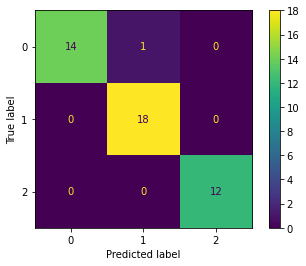

In [20]:
plot_confusion_matrix(model, X_test, y_test)

# Application

In [21]:
def application(idx=None):
    if idx is None:
        idx = np.random.randint(len(X_test))
    print('Collected new features as follows:')
    print(X_test.iloc[idx])
    names = dataset['target_names']
    forecasted = model.predict(X_test.iloc[idx:idx+1])[0]
    actual = y_test.iloc[idx]
    print(f'\n{"CORRECT" if forecasted==actual else "WRONG"}')
    print(f'\nModel forecasted as {forecasted} ({names[forecasted]})')
    print(f'\nActual data should be {actual} ({names[actual]})')

In [22]:
application()

Collected new features as follows:
alcohol                          12.77
malic_acid                        3.43
ash                               1.98
alcalinity_of_ash                16.00
magnesium                        80.00
total_phenols                     1.63
flavanoids                        1.25
nonflavanoid_phenols              0.43
proanthocyanins                   0.83
color_intensity                   3.40
hue                               0.70
od280/od315_of_diluted_wines      2.12
proline                         372.00
Name: 118, dtype: float64

CORRECT

Model forecasted as 1 (class_1)

Actual data should be 1 (class_1)
